<a href="https://colab.research.google.com/github/TwoGunTitan/ALPR-using-opencv/blob/main/LPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,654 k

In [ ]:
import imageio
import scipy.ndimage.filters

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image = cv2.imread("/content/drive/MyDrive/number plates/51.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

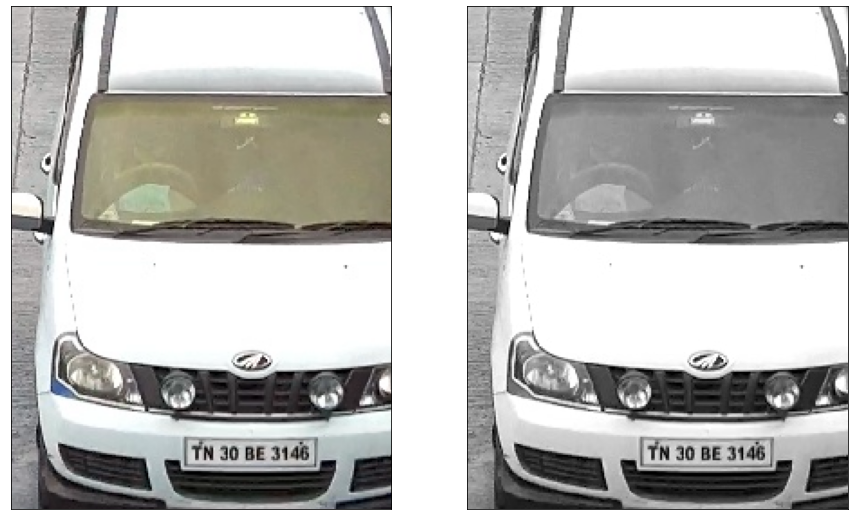

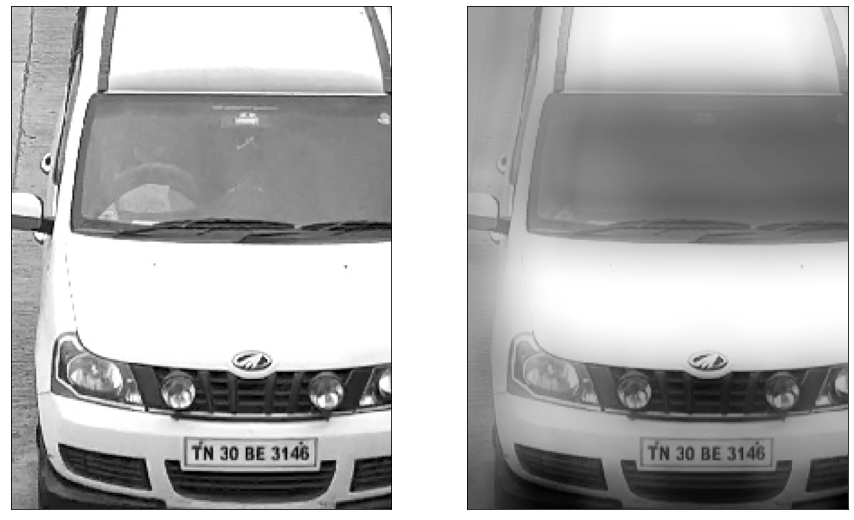

In [ ]:
plot_images(image, gray)
blur = cv2.bilateralFilter(gray, 50,125,125)
plot_images(gray, blur)

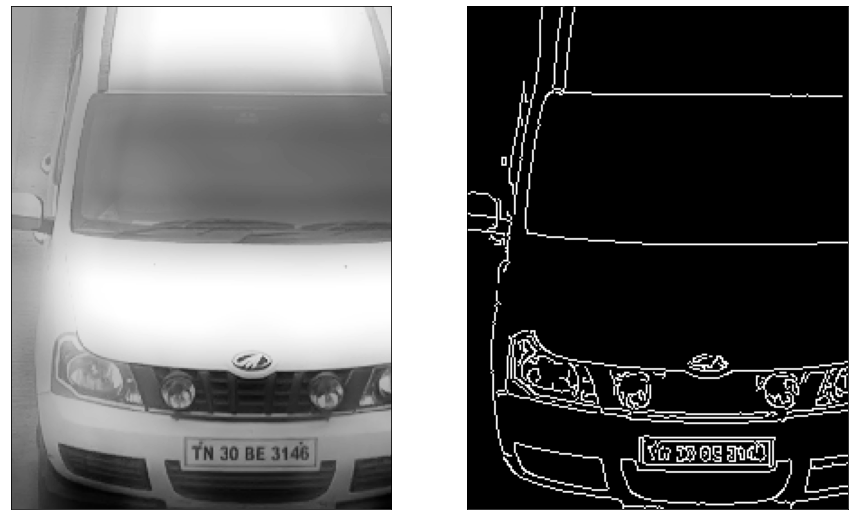

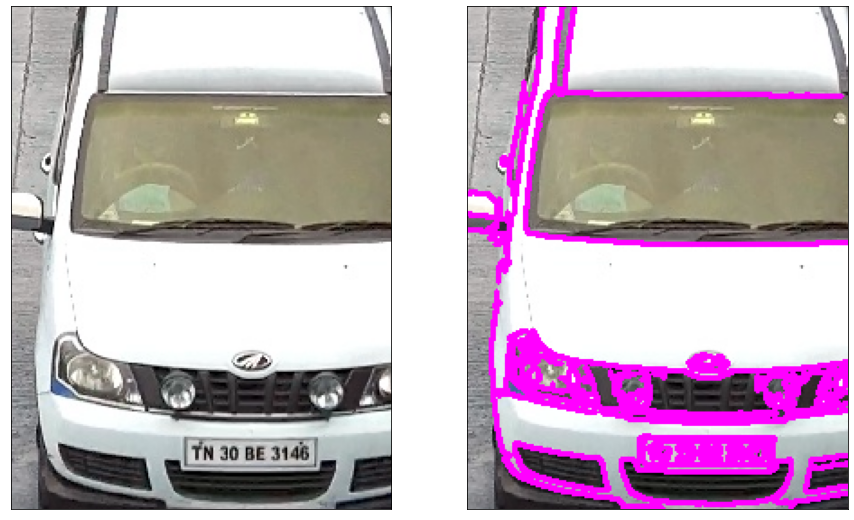

In [ ]:
edges = cv2.Canny(blur, 30, 200)
plot_images(blur, edges)
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)
plot_images(image, image_copy)

In [ ]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

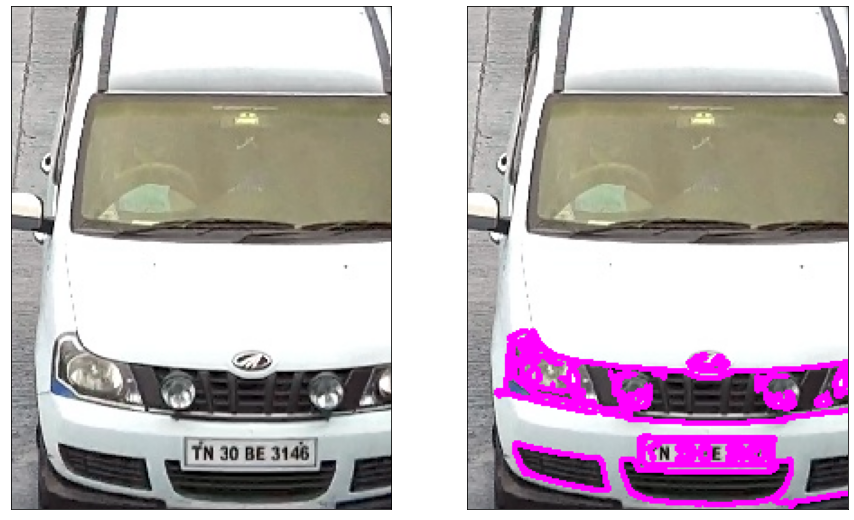

In [ ]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)
plot_images(image, image_copy)
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

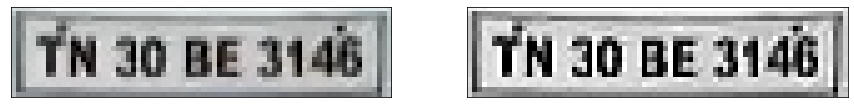

In [ ]:
cv2.imwrite("plate1.png", plate)
plate_tmp = imageio.imread('plate1.png', as_gray = True)
plate_tmp = (plate_tmp - np.amin(plate_tmp))*255.0 /(np.amax(plate_tmp)-np.amin(plate_tmp))
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
Lap = scipy.ndimage.filters.convolve(plate_tmp, kernel)
ShF = 100
Laps = Lap*ShF/np.amax(Lap)
plate2 = plate_tmp + Laps
plate2 = np.clip(plate2, 0, 255)
plot_images(plate,plate2)

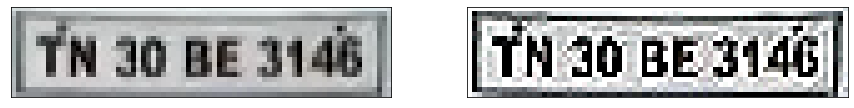

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
plate_sharp = cv2.filter2D(src=plate, ddepth=-1, kernel=kernel)
# cv2.imwrite("plate.png", plate_sharp)
plot_images(plate, plate_sharp)

In [ ]:
edges1 = cv2.Canny(plate2, 30, 200)
plot_images(plate2, edges1)
cnts1, new1 = cv2.findContours(edges1.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image_copy1 = plate2.copy()
_ = cv2.drawContours(image_copy1, cnts, -1, (255,0,255),2)
plot_images(plate2, image_copy1)

error: ignored

In [ ]:
text = pytesseract.image_to_string(plate_sharp, lang="eng")
print(text)